# ✤  Capstone Final Project 

### Content
+ 1.Introduction
+ 2.Data description
+ 3.EDA
+ 4.Data preparation
+ 5.Models Creation
+ 6.Models Comparison
+ 7.Conclusion

## 1. Introduction

+ The purpose is to build a model that will predict value for the variable - Target (numerical), i.e. it is a regression problem. Use 'train.csv' file for training your model/models. Predict the Target variable for the test dataset in 'test.csv' file. Note that you don't have access to Target variable in the test dataset. Evaluation of models should be done based on the following metric: MSE - mean squared error.


## 2. Data description:

    Id - id of the observation
    + Target -is for our target variable 
    + N1 to N6 - numerical variables
    + C1 - ordinal categorical variable
    + C2 to C9 - nominal categorical variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

## 3. Data description

In [ ]:
df_train = pd.read_csv('final-exam-bda/train.csv').set_index('Id')
df_train

,Target,N1,N2,N3,N4,N5,N6,C1,C2,C3,C4,C5,C6,C7,C8,C9
Id,,,,,,,,,,,,,,,,
10000,1500000,2056164.384,11,1.8,0.0,9.0,6.0,1,M,F,V,B,S,J,T,D
10001,2993000,3572619.048,8,2.5,8.0,6.0,9.0,2,A,F,V,B,S,J,N,1
10002,9500000,9813953.488,6,3.5,2.0,9.0,0.0,1,A,B,K,B,S,W,D,D
10003,4056000,4529545.455,5,2.5,4.0,6.0,4.0,1,A,F,K,BG,S,4,T,1
10004,3543000,3823255.814,10,3.5,1.0,5.0,4.0,1,A,F,K,BG,S,4,T,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2023000,2200000.000,14,2.2,5.0,5.0,5.0,1,M,F,V,D,M,W,D,F
14996,2000000,2265060.241,14,3.0,8.0,2.0,7.0,1,A,F,K,B,S,4,T,1
14997,4040000,4691666.667,11,3.3,3.0,2.0,5.0,2,A,F,K,B,C,J,T,E


In [ ]:
df_test = pd.read_csv('final-exam-bda/test.csv').set_index('Id')
df_test

,N1,N2,N3,N4,N5,N6,C1,C2,C3,C4,C5,C6,C7,C8,C9
Id,,,,,,,,,,,,,,,
20000,2828048.780,8,1.8,6.0,1.0,9.0,1,A,F,V,B,S,W,V,W
20001,2866279.070,3,1.6,1.0,2.0,7.0,2,A,F,V,B,L,Z,9,4
20002,4620238.095,4,2.0,6.0,6.0,2.0,2,A,A,K,B,C,J,M,B
20003,3400000.000,9,2.5,9.0,1.0,9.0,1,A,A,V,B,U,J,F,1
20004,3751851.852,9,3.5,8.0,3.0,7.0,1,A,F,K,B,S,J,T,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,3586746.988,10,2.4,0.0,2.0,8.0,1,A,F,V,B,C,J,H,L
20996,1187209.302,19,1.6,1.0,2.0,4.0,1,A,F,V,B,S,W,V,W
20997,3211111.111,9,2.4,2.0,6.0,2.0,3,A,F,V,BG,S,6,T,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 10000 to 14999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  5000 non-null   int64  
 1   N1      5000 non-null   float64
 2   N2      5000 non-null   int64  
 3   N3      5000 non-null   float64
 4   N4      4995 non-null   float64
 5   N5      4995 non-null   float64
 6   N6      4994 non-null   float64
 7   C1      5000 non-null   int64  
 8   C2      5000 non-null   object 
 9   C3      5000 non-null   object 
 10  C4      5000 non-null   object 
 11  C5      5000 non-null   object 
 12  C6      5000 non-null   object 
 13  C7      4999 non-null   object 
 14  C8      4999 non-null   object 
 15  C9      4999 non-null   object 
dtypes: float64(5), int64(3), object(8)
memory usage: 664.1+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 20000 to 20999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N1      1000 non-null   float64
 1   N2      1000 non-null   int64  
 2   N3      1000 non-null   float64
 3   N4      1000 non-null   float64
 4   N5      1000 non-null   float64
 5   N6      1000 non-null   float64
 6   C1      1000 non-null   int64  
 7   C2      1000 non-null   object 
 8   C3      1000 non-null   object 
 9   C4      1000 non-null   object 
 10  C5      1000 non-null   object 
 11  C6      1000 non-null   object 
 12  C7      1000 non-null   object 
 13  C8      1000 non-null   object 
 14  C9      1000 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 125.0+ KB


## 4. EDA

In [ ]:
categorical_cols = df_train.columns[df_train.columns.str.startswith('C')].tolist()
df_train[categorical_cols].describe(include='object')

,C2,C3,C4,C5,C6,C7,C8,C9
count,5000,5000,5000,5000,5000,4999,4999,4999
unique,2,3,3,5,7,22,29,32
top,A,F,V,B,S,J,T,1
freq,4198,3395,2995,4211,2884,1516,1467,1064


In [ ]:
df_train.describe()

,Target,N1,N2,N3,N4,N5,N6,C1
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,4995.000000,4995.000000,4994.000000,5000.000000
mean,3.268910e+06,3.686798e+06,8.207600,2.298200,4.427027,4.526126,4.434722,1.643200
std,2.002069e+06,2.115422e+06,4.420816,0.717473,2.892762,2.907785,2.907934,0.729383
min,7.000000e+05,6.871795e+05,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.142750e+06,2.482731e+06,4.000000,1.600000,2.000000,2.000000,2.000000,1.000000
50%,2.731500e+06,3.157179e+06,9.000000,2.300000,4.000000,5.000000,4.000000,1.000000
75%,3.830250e+06,4.304605e+06,11.000000,2.700000,7.000000,7.000000,7.000000,2.000000
max,2.305900e+07,2.266484e+07,19.000000,5.700000,9.000000,9.000000,9.000000,3.000000


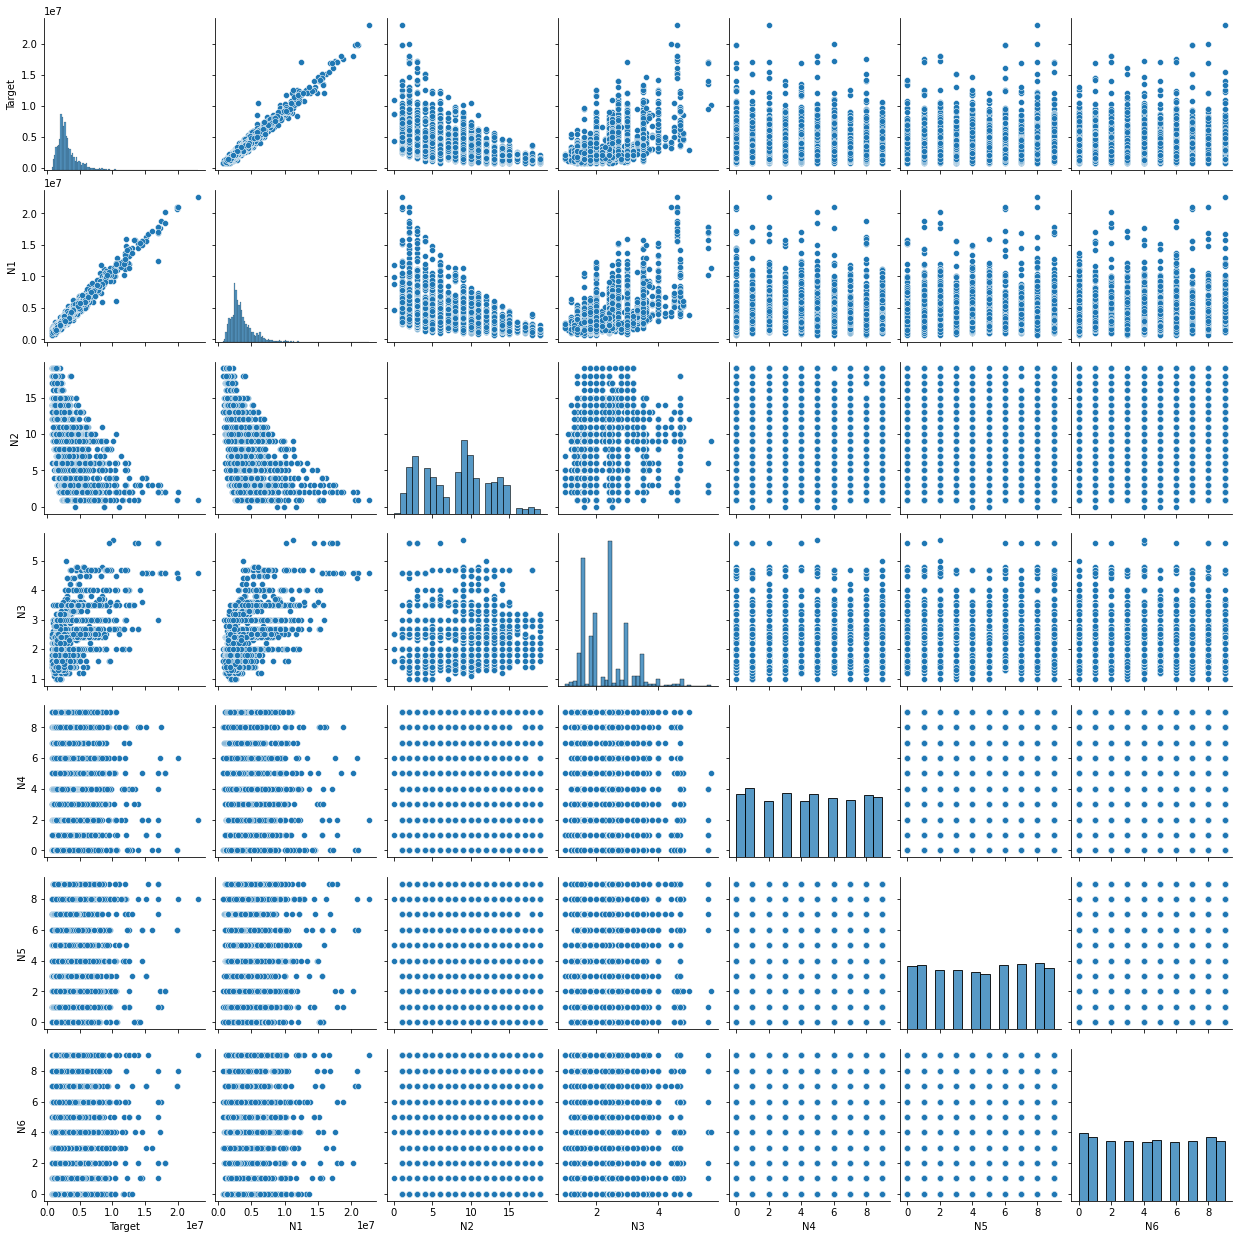

In [ ]:
numeric_cols = df_train.select_dtypes(include=np.number).columns.tolist()[:-1]
sns.pairplot(df_train[numeric_cols])

## 5. Data preparation

In [ ]:
# Checking for missing values

df_train.isna().sum()

Target    0
N1        0
N2        0
N3        0
N4        5
N5        5
N6        6
C1        0
C2        0
C3        0
C4        0
C5        0
C6        0
C7        1
C8        1
C9        1
dtype: int64

In [ ]:
# Deleting any null value

df_train = df_train.dropna()

In [ ]:
# Splitting data into train and test sets

X_train = df_train.drop('Target', axis=1)
y_train = df_train['Target']

X_test = df_test

In [ ]:
# Including dummy variales

dummy_variables = df_train[categorical_cols].columns[df_train[categorical_cols].nunique().values<4].tolist()
X_train = pd.get_dummies(X_train, columns=dummy_variables, drop_first=True)
X_test = pd.get_dummies(X_test, columns=dummy_variables, drop_first=True)

In [ ]:
# Applying label encoding on variables with unique elements more than 3

label_variables = df_train[categorical_cols].columns[df_train[categorical_cols].nunique().values>=4].tolist()
for var in label_variables:
    X_train[var] = pd.factorize(X_train[var], sort=True)[0]
    X_test[var] = pd.factorize(X_test[var], sort=True)[0]

In [ ]:
# Scaling numeric values with StandardScaler

scaler = StandardScaler()
X_train[X_train.columns.tolist()] = scaler.fit_transform(X_train[X_train.columns.tolist()])
X_test[X_train.columns.tolist()] = scaler.fit_transform(X_test[X_train.columns.tolist()])

## 6. Models Creation

In [ ]:
# Creating and fitting Random Forest Regression

randFor = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
# Model's performance using cross-validation

abs(cross_val_score(randFor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()

93965079632.66649

In [ ]:
# Setting parameters to tune the model

param = {'bootstrap': [True],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
        }

In [ ]:
randSearch = RandomizedSearchCV(randFor, param, n_iter = 100, cv = 5, verbose=2, random_state=0, scoring='neg_mean_squared_error', n_jobs = -1)
search = randSearch.fit(X_train, y_train)
print('Best features for Random Forest:', search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best features for Random Forest: {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}


In [ ]:
# Applying cross validation to evaluate tuned model's performance

randFor = RandomForestRegressor(n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features='auto', max_depth=20, bootstrap=True).fit(X_train, y_train)

randForMSE = abs(cross_val_score(randFor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()

In [ ]:
# Creating and fitting Ridge Regression

rid = Ridge().fit(X_train, y_train)

In [ ]:
# Model's performance using cross-validation

abs(cross_val_score(rid, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()

In [ ]:
# Finding optimal alpha value to tune the model

rid = RidgeCV(alphas=np.arange(1, 100001)).fit(X_train, y_train)
rid.alpha_

In [ ]:
# Applying cross validation to evaluate model's performane

rid = Ridge(alpha=1).fit(X_train, y_train)

ridMSE = abs(cross_val_score(rid, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()

ridMSE

In [ ]:
# Creating and fitting Lasso Regression

las = Lasso().fit(X_train, y_train)

In [ ]:
# Model's performance using cross-validation

abs(cross_val_score(las, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()

In [ ]:
# Finding optimal alpha value to tune the model

las = LassoCV(alphas=np.arange(1, 1001)).fit(X_train, y_train)
las.alpha_

In [ ]:
# Apply cross validation to evaluate model's performane

las = Lasso(alpha=995).fit(X_train, y_train)

lasMSE = abs(cross_val_score(las, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()

lasMSE

## 7. Models Comparison

In [ ]:
print('Mean Squared Error for Random Forest:', randForMSE)
print('Mean Squared Error for Ridge:', ridMSE)
print('Mean Squared Error for Lasso:', lasMSE)

In [ ]:
# Saving predictions in csv file

y_pred = randFor.predict(X_test)

y_test = pd.DataFrame({'Target': y_pred}, index=X_test.index)

y_test.to_csv('bestSubmission.csv')